In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams.update({'font.size': 13, 'figure.figsize': (8, 6)})
import seaborn as sns
sns.set_style('white')

Import the dataset.

In [3]:
df = pd.read_csv('datasets/data.csv')
df['time'] = df['time'].astype('timedelta64[h]')
df = df.set_index('time')
df.head()

,e15x30SspGyrB,e22x30SspGyrB,e32x30SspGyrB,e33x30SspGyrB,e34x30SspGyrB,e41x30SspGyrB,e42x30SspGyrB,e15x30TerThyXS2,e22x30TerThyXS2,e38x30TerThyXS2,...,e33x30TerThyXS1,e15x30STPhoRadA,e16x30STPhoRadA,e17x30STPhoRadA,e20x30STPhoRadA,e22x30STPhoRadA,e26x30STPhoRadA,e32x30STPhoRadA,e33x30STPhoRadA,e34x30STPhoRadA
time,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,865.00,542.57,-255.06,-460.36,1396.61,2607.87,1001.17,3074.07,5128.69,-98941.85,...,31066.56,2557.81,-329.19,1231.00,7644.86,978.90,-513.19,977.02,526.09,1998.59
0 days 00:00:00,-5631.87,16083.00,15846.15,87346.15,-29278.85,-249903.85,-448653.85,-24756.79,-31848.29,-32232.28,...,-7204.98,-6562.50,-5052.66,20942.93,-317403.85,307179.49,-54562.94,-1076153.85,-22385.73,-20009.27
0 days 00:00:00,-2787.10,-2430.98,-2223.95,-3298.76,-1237.34,-238.95,-3712.77,-2212.60,-1720.43,2593.30,...,-3253.00,-3536.96,-3284.46,-2977.84,-1098.21,-1323.90,-1237.34,-2636.30,2172.90,29032.26
0 days 01:00:00,-3167.37,-692.70,1924.84,-1405.56,7541.17,2415.46,4448.56,14123.58,7505.06,6264.00,...,-3818.18,-3629.25,-3215.20,-480.16,4302.83,-892.03,512.22,2130.34,1082.13,30547.85
0 days 01:00:00,-1446.41,671.95,316.13,309.45,3907.00,1085.81,1788.62,12143.23,9149.73,1550.52,...,-2779.83,-2574.53,-1493.90,-39.34,1334.97,275.80,554.05,-47.13,2774.13,8895.54


In [3]:
df2 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [4]:
df2.columns

Index(['e15x30SspGyrB', 'e22x30SspGyrB', 'e32x30SspGyrB', 'e33x30SspGyrB',
       'e34x30SspGyrB', 'e41x30SspGyrB', 'e42x30SspGyrB', 'e15x30TerThyXS2',
       'e22x30TerThyXS2', 'e38x30TerThyXS2', 'e16x30TerThyXS1',
       'e33x30TerThyXS1', 'e15x30STPhoRadA', 'e16x30STPhoRadA',
       'e17x30STPhoRadA', 'e20x30STPhoRadA', 'e22x30STPhoRadA',
       'e26x30STPhoRadA', 'e32x30STPhoRadA', 'e33x30STPhoRadA',
       'e34x30STPhoRadA'],
      dtype='object')

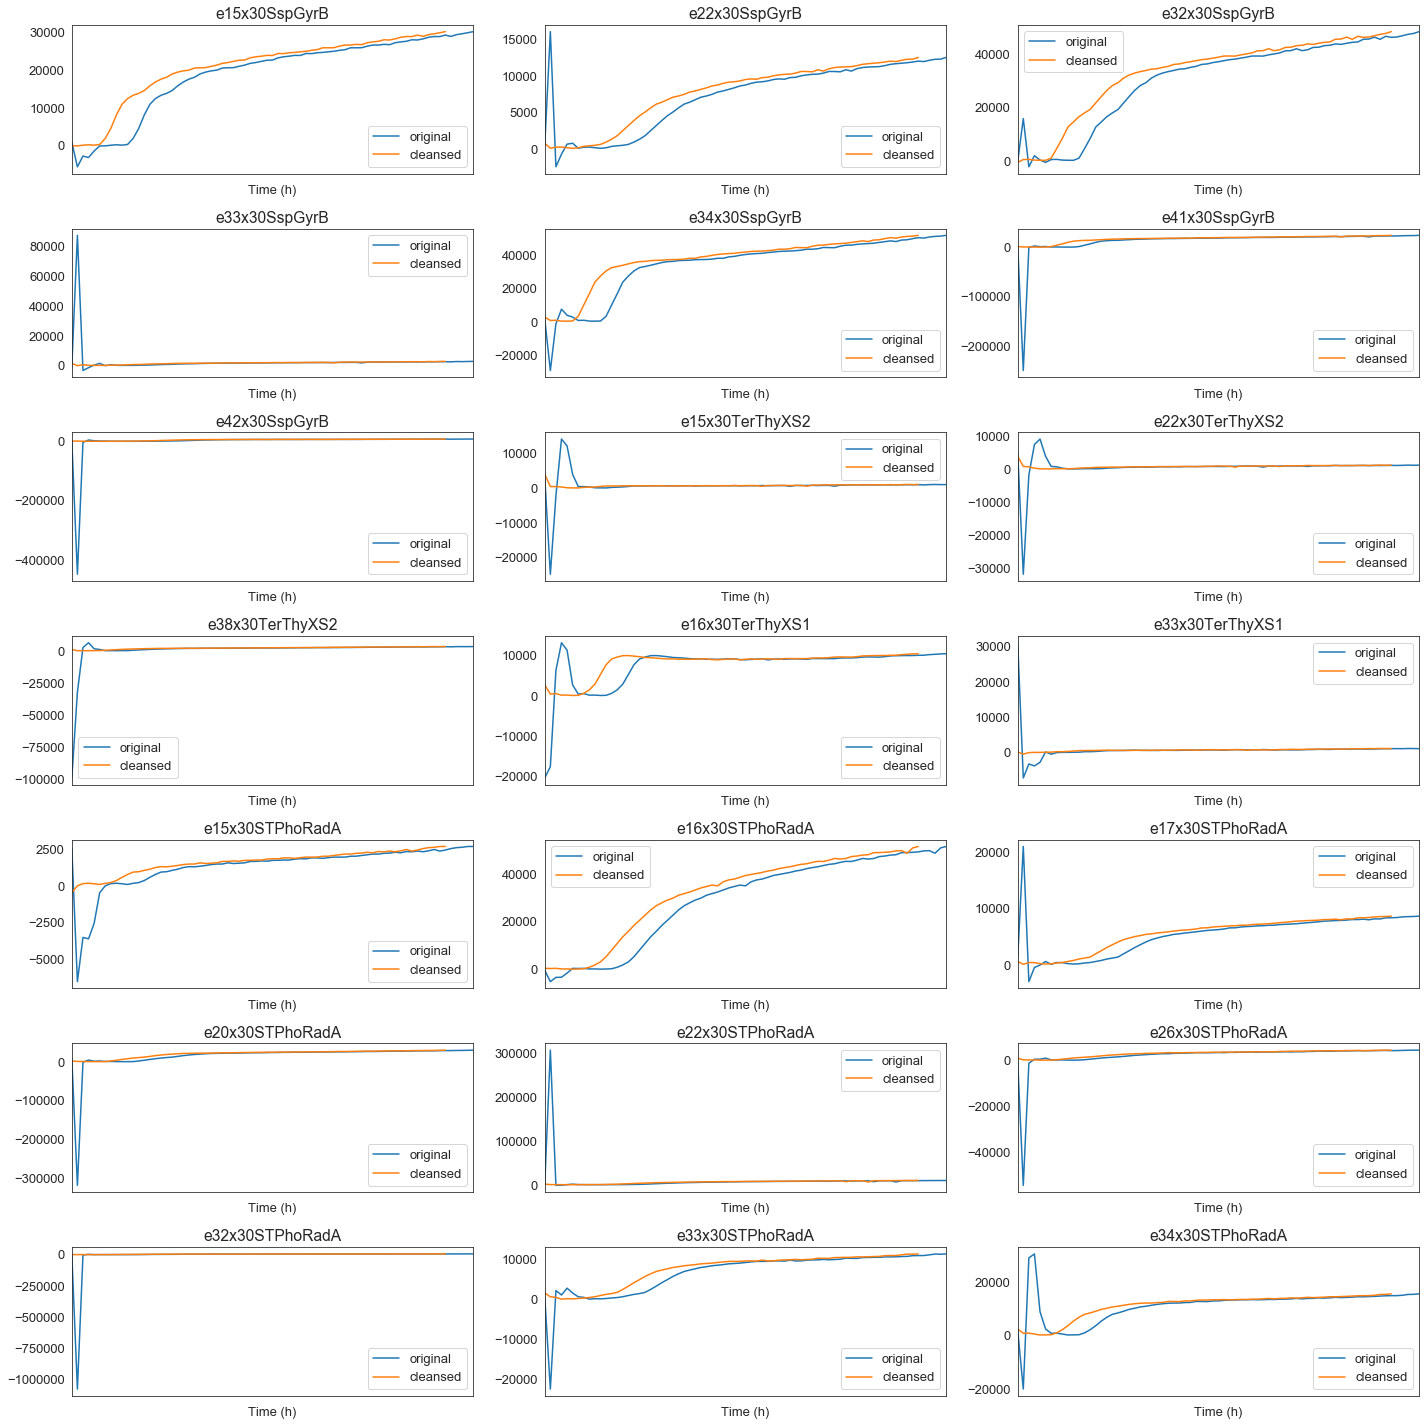

In [13]:
plt.figure(figsize=(20, 20))
num_col = 3
num_vars = len(df2.columns.tolist())
num_row = int(np.ceil(num_vars)/num_col)
for i in range(num_vars):
    plt.subplot(num_row, num_col, i+1)
    df[df.columns[i]].plot(label='original')
    df2[df2.columns[i]].plot(label='cleansed')
    plt.legend()
    plt.title(df2.columns[i])
plt.tight_layout()
plt.show()

#### Curve fitting without initial parameter optimisation

0 e15x30SspGyrB
1 e22x30SspGyrB
2 e32x30SspGyrB


/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


3 e33x30SspGyrB
4 e34x30SspGyrB
5 e41x30SspGyrB
6 e42x30SspGyrB
7 e15x30TerThyXS2
8 e22x30TerThyXS2
9 e38x30TerThyXS2


/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


10 e16x30TerThyXS1
11 e33x30TerThyXS1
12 e15x30STPhoRadA
13 e16x30STPhoRadA
14 e17x30STPhoRadA
15 e20x30STPhoRadA
16 e22x30STPhoRadA
17 e26x30STPhoRadA
18 e32x30STPhoRadA
19 e33x30STPhoRadA
20 e34x30STPhoRadA


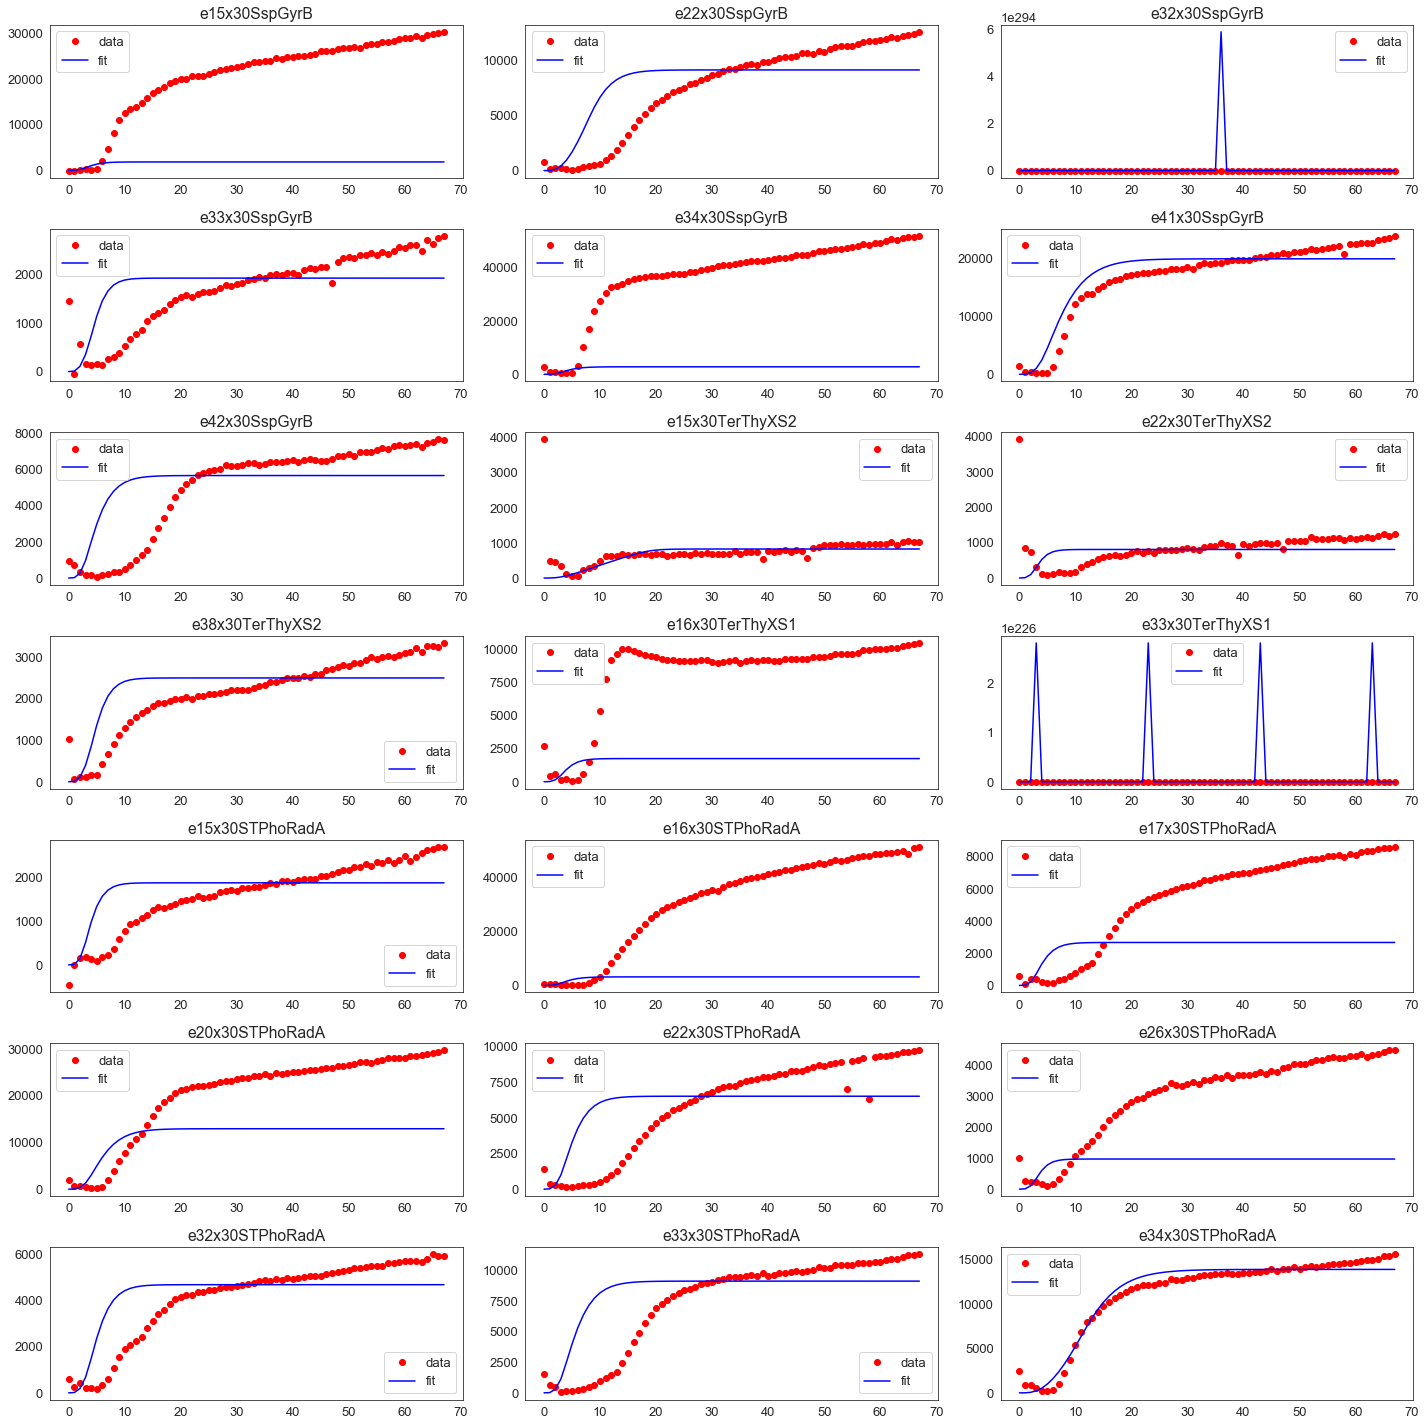

In [16]:
def fitfunc(t, xfpra, xrpra, xkma, xkpa, xdma, xda, xfprb, xrprb, xkmb, xkpb, xdmb, xdb, xkspl, xfprc, xrprc, xkmc, xkpc, xdmc, xdc, xdic, xCa0):
    
    fpra = xfpra
    rpra = xrpra
    kma = xkma
    kpa = xkpa
    dma = xdma
    da = xda
    fprb = xfprb
    rprb = xrprb
    kmb = xkmb
    kpb = xkpb
    dmb = xdmb
    db = xdb
    kspl = xkspl
    fprc = xfprc
    rprc = xrprc
    kmc = xkmc
    kpc = xkpc
    dmc = xdmc
    dc = xdc
    dic = xdic
    Ca0 = xCa0
    
    def andGate(y, t):
        [Ia, pA, pAIa, mA, A, Ib, pB, pBIb, mB, B, Ic, w, pC, pCIc, mC, C] = y
        Ia_ = -1 * fpra * Ia * pA + rpra * pAIa
        pA_ = -1 * fpra * Ia * pA + rpra * pAIa
        pAIa_ = fpra * Ia * pA + -1 * rpra * pAIa + -1 * kma * pAIa + kma * pAIa
        mA_ = kma * pAIa + -1 * kpa * mA + kpa * mA + -1 * dma * mA
        A_ = kpa * mA + -1 * da * A + -1 * kspl * A * B
        Ib_ = -1 * fprb * Ib * pB + rprb * pBIb
        pB_ = -1 * fprb * Ib * pB + rprb * pBIb
        pBIb_ = fprb * Ib * pB + -1 * rprb * pBIb + -1 * kmb * pBIb + kmb * pBIb
        mB_ = kmb * pBIb + -1 * kpb * mB + kpb * mB + -1 * dmb * mB
        B_ = kpb * mB + -1 * db * B + -1 * kspl * A * B
        Ic_ = kspl * A * B + -1 * fprc * Ic * pC + rprc * pCIc + -1 * dic * Ic
        w_ = kspl * A * B
        pC_ = -1 * fprc * Ic * pC + rprc * pCIc
        pCIc_ = fprc * Ic * pC + -1 * rprc * pCIc + -1 * kmc * pCIc + kmc * pCIc
        mC_ = kmc * pCIc + -1 * kpc * mC + kpc * mC + -1 * dmc * mC
        C_ = kpc * mC + -1 * dc * C
        return [Ia_, pA_, pAIa_, mA_, A_, Ib_, pB_, pBIb_, mB_, B_, Ic_, w_, pC_, pCIc_, mC_, C_]
    
    Casol = odeint(andGate, Ca0, t)
    return Casol[:,15]

def modelfit(t, fpra, rpra, kma, kpa, dma, da, fprb, rprb, kmb, kpb, dmb, db, kspl, fprc, rprc, kmc, kpc, dmc, dc, dic):
    return fitfunc(t, fpra, rpra, kma, kpa, dma, da, fprb, rprb, kmb, kpb, dmb, db, kspl, fprc, rprc, kmc, kpc, dmc, dc, dic, Ca0)

plt.figure(figsize=(20, 20))
num_col = 3
num_vars = len(df2.columns.tolist())
num_row = int(np.ceil(num_vars)/num_col)
for i in range(num_vars):
    
    print(i, df2.columns[i])
    
    plt.subplot(num_row, num_col, i+1)
    
    cdata = df2[df2.columns[i]]
    t = list(range(0, len(cdata.index)))
    Ca0 = [500, 800, 0.0, 0.0, 0.0,
          500, 800, 0.0, 0.0, 0.0,
          0.0, 0.0, 800, 0.0, 0.0, 0.0]
    
    params, cov = curve_fit(modelfit, t, cdata)
    fit = fitfunc(t, *params, Ca0)
    
    plt.plot(t, cdata, 'ro', label='data')
    plt.plot(t, fit, 'b-', label='fit')
    plt.legend(loc='best')

    plt.title(df2.columns[i])
    
plt.tight_layout()
plt.show()

#### With initial parameter optimisation

In [17]:
def SquaredError(InitialParameterGuess):
    
    try:
        #Some guesses will result in an error or an invalid integration 
        #this ensures that the error is estimated only for valid solutions 
        params, cov=curve_fit(modelfit,t,cdata,p0=InitialParameterGuess)
        cSolution=fitfunc(t, *params, Ca0)
    
        error=[(val-sal)**2 for val,sal in zip(cSolution,cdata)]
        
    except RuntimeError:
        
        #Based on the scale of the data the following list of values will be large enough to be rejected as a solution 
        error=[10,10]
    
    return sum(error)

def RandomSearch(Iterations):
    
    nIt=Iterations 
    GuessContainer=[]
    ErrorContainer=[]
    
    for k in range(nIt):
        
        lGuess=[np.random.uniform(low=0,high=1) for val in range(20)]
        lerror=SquaredError(lGuess)
        
        GuessContainer.append(lGuess) #Contains the list of random initial values 
        ErrorContainer.append(lerror) #List of the errors 
    
    minError=np.min(ErrorContainer) #Min error value 
    minLocation=[j for j in range(nIt) if ErrorContainer[j]==minError] #Returns the location of the min value in the list
    
    bestGuess=GuessContainer[minLocation[0]] #Best initial value guess 
    
    return ErrorContainer, bestGuess

0 e15x30SspGyrB
1 e22x30SspGyrB


/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/scipy/optimize/minpack.py:766: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


2 e32x30SspGyrB


/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


3 e33x30SspGyrB
4 e34x30SspGyrB
5 e41x30SspGyrB
6 e42x30SspGyrB
7 e15x30TerThyXS2
8 e22x30TerThyXS2
9 e38x30TerThyXS2
10 e16x30TerThyXS1
11 e33x30TerThyXS1
12 e15x30STPhoRadA
13 e16x30STPhoRadA
14 e17x30STPhoRadA
15 e20x30STPhoRadA
16 e22x30STPhoRadA
17 e26x30STPhoRadA
18 e32x30STPhoRadA
19 e33x30STPhoRadA
20 e34x30STPhoRadA


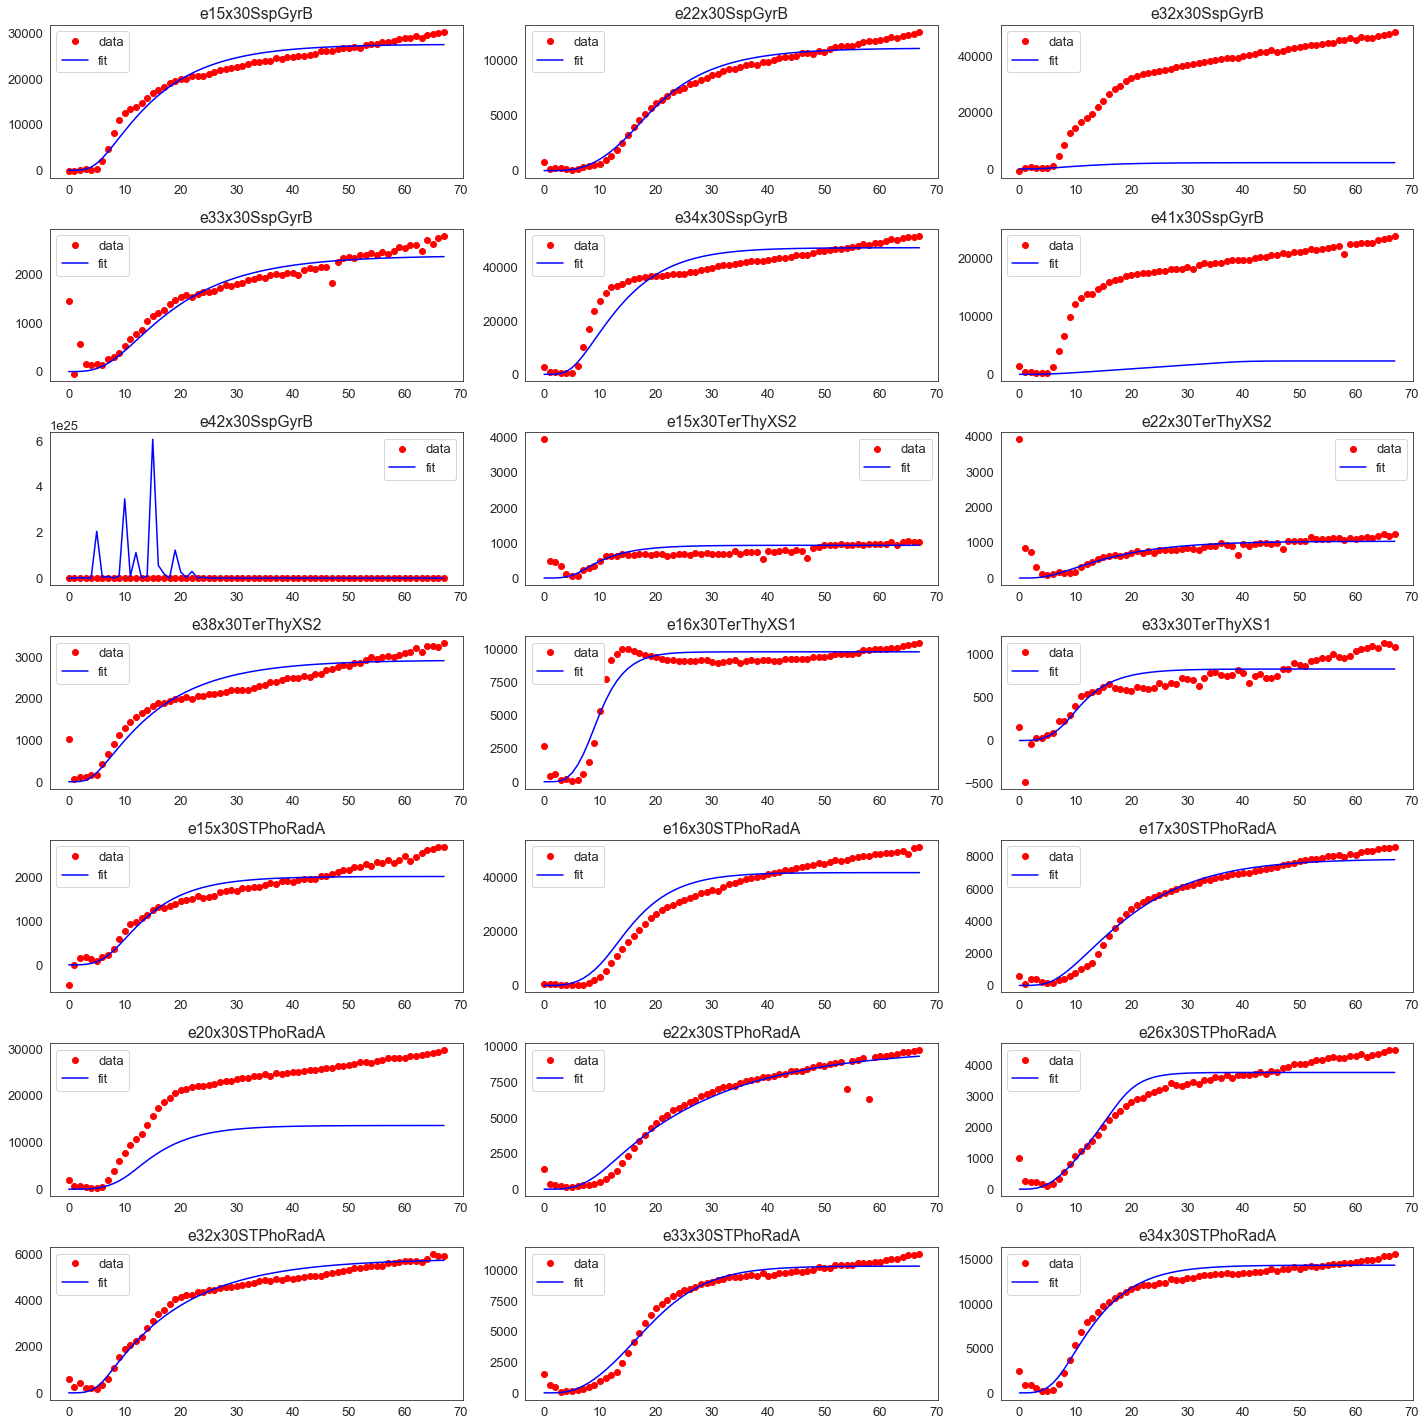

In [18]:
output_params = []
plt.figure(figsize=(20, 20))
num_col = 3
num_vars = len(df2.columns.tolist())
num_row = int(np.ceil(num_vars)/num_col)

#plotting
for i in range(num_vars):
    
    print(i, df2.columns[i])
    plt.subplot(num_row, num_col, i+1)
    
    cdata = df2[df2.columns[i]]
    t = list(range(0, len(cdata.index)))
    Ca0 = [500, 800, 0.0, 0.0, 0.0,
          500, 800, 0.0, 0.0, 0.0,
          0.0, 0.0, 800, 0.0, 0.0, 0.0]
    
    #find the best initial values
    errs, bG = RandomSearch(5)
    
    #apply the best initial values
    params, cov=curve_fit(modelfit, t, cdata, p0=bG)
    output_params.append((df2.columns[i], params))
    solution=fitfunc(t, *params, Ca0)
    
    plt.plot(t,cdata,'ro',label='data')
    plt.plot(t,solution,'b-',label='fit')
    plt.legend(loc='best')

    plt.title(df2.columns[i])
    
plt.tight_layout()
plt.show()

In [19]:
params

array([0.30167917, 0.41766539, 0.38585556, 0.39974439, 0.14289717,
       0.38814527, 0.47968489, 0.6960542 , 0.92032652, 0.14401813,
       0.27913874, 0.47273934, 0.71186682, 0.05849644, 0.24887426,
       0.32703522, 2.26544955, 0.20621472, 0.19966981, 0.11003672])

0 e15x30SspGyrB


/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


1 e22x30SspGyrB
2 e32x30SspGyrB
3 e33x30SspGyrB
4 e34x30SspGyrB
5 e41x30SspGyrB
6 e42x30SspGyrB
7 e15x30TerThyXS2
8 e22x30TerThyXS2
9 e38x30TerThyXS2
10 e16x30TerThyXS1
11 e33x30TerThyXS1
12 e15x30STPhoRadA
13 e16x30STPhoRadA
14 e17x30STPhoRadA
15 e20x30STPhoRadA
16 e22x30STPhoRadA
17 e26x30STPhoRadA
18 e32x30STPhoRadA


/Users/mardian/Documents/Notebook/env/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars


19 e33x30STPhoRadA
20 e34x30STPhoRadA


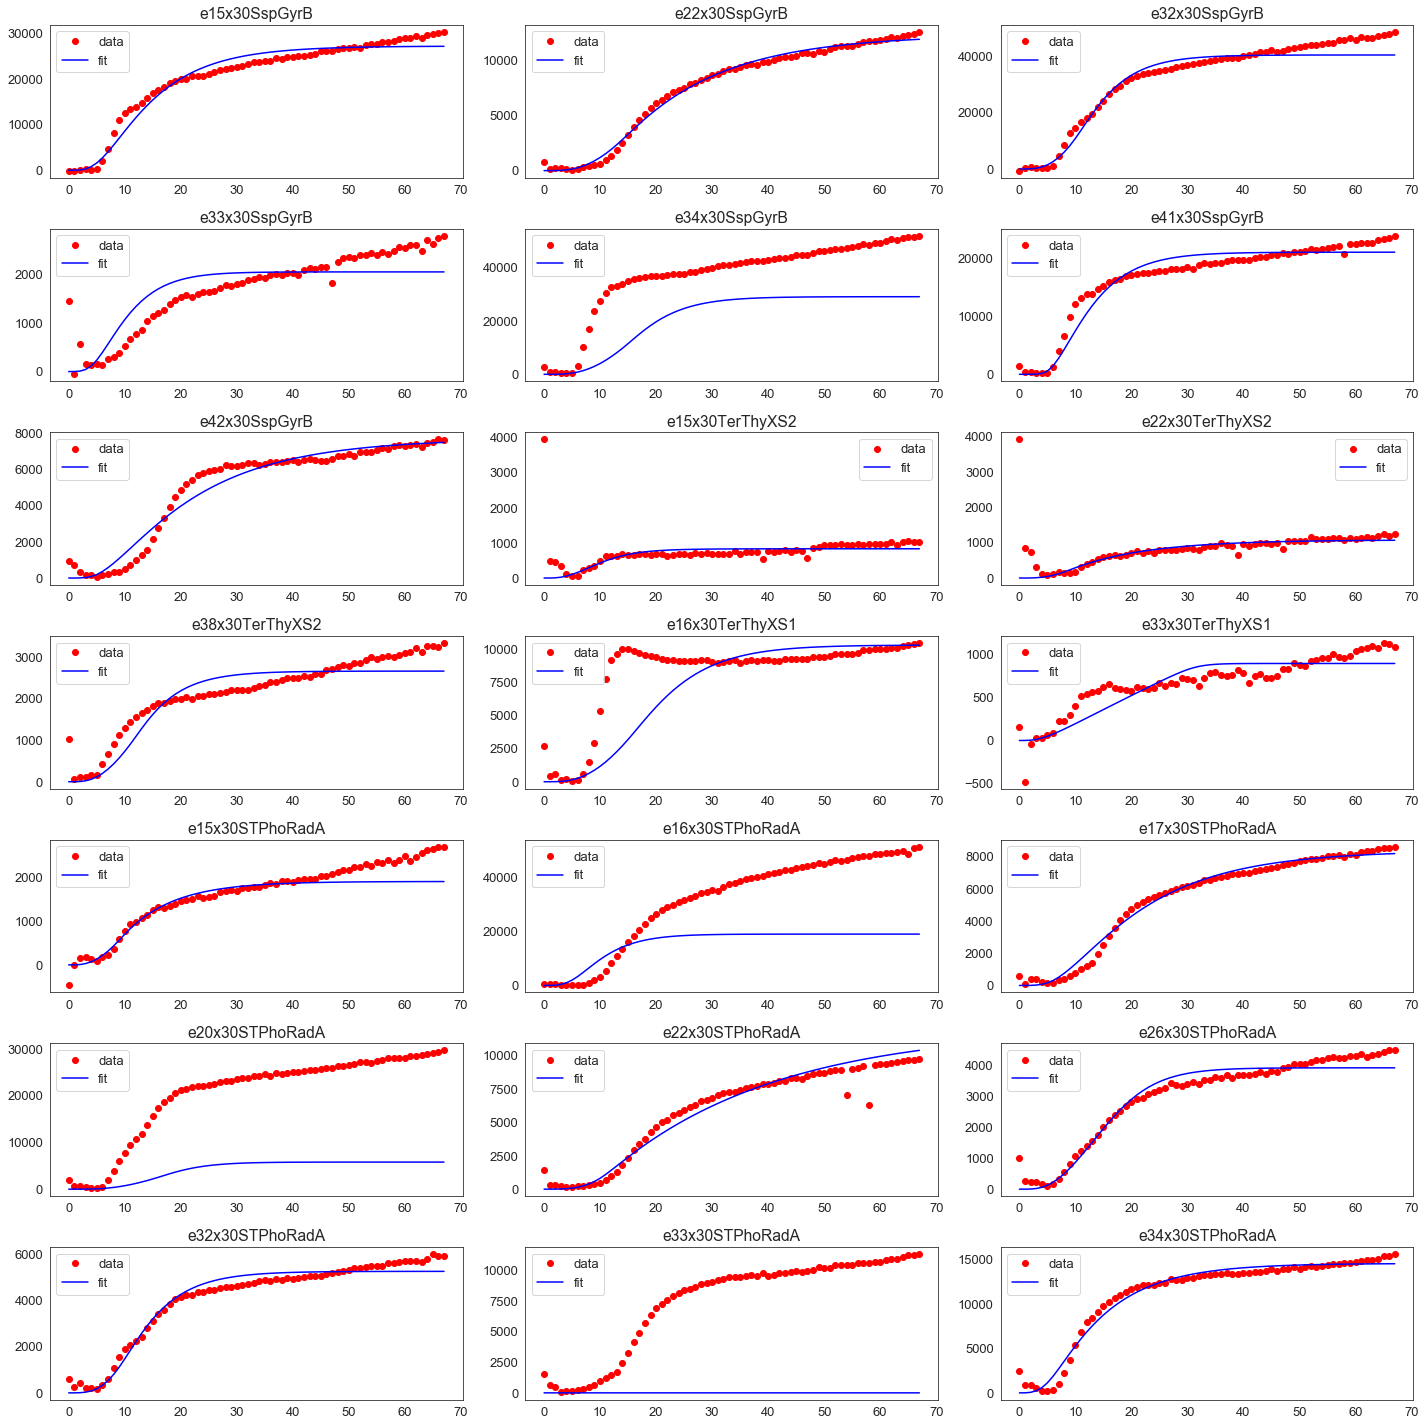

In [21]:
output_params = []
plt.figure(figsize=(20, 20))
num_col = 3
num_vars = len(df2.columns.tolist())
num_row = int(np.ceil(num_vars)/num_col)
for i in range(num_vars):
    
    print(i, df2.columns[i])
    plt.subplot(num_row, num_col, i+1)
    
    cdata = df2[df2.columns[i]]
    t = list(range(0, len(cdata.index)))
    Ca0 = [500, 800, 0.0, 0.0, 0.0,
          500, 800, 0.0, 0.0, 0.0,
          0.0, 0.0, 800, 0.0, 0.0, 0.0]
    
    errs, bG = RandomSearch(5)
    params, cov=curve_fit(modelfit, t, cdata, p0=bG)
    output_params.append((df2.columns[i], params))
    solution=fitfunc(t, *params, Ca0)
    
    plt.plot(t,cdata,'ro',label='data')
    plt.plot(t,solution,'b-',label='fit')
    plt.legend(loc='best')

    plt.title(df2.columns[i])
    
plt.tight_layout()
plt.show()

In [32]:
index = [idx for idx, val in output_params]
values = [val for idx, val in output_params]
cols = ['fpra', 'rpra', 'kma', 'kpa', 'dma', 'da',
        'fprb', 'rprb', 'kmb', 'kpb', 'dmb', 'db', 'kspl',
        'fprc', 'rprc', 'kmc', 'kpc', 'dmc', 'dc', 'dic']

df_params = pd.DataFrame(values, index=index, columns=cols)
df_params

,fpra,rpra,kma,kpa,dma,da,fprb,rprb,kmb,kpb,dmb,db,kspl,fprc,rprc,kmc,kpc,dmc,dc,dic
e15x30SspGyrB,0.639782,0.100422,0.411839,9.616471e-01,9.080502e-01,0.599336,0.353397,0.381592,0.676232,0.381064,4.308024e-02,3.574903e-01,7.879203e-01,0.040958,0.785868,0.740827,1.533074e+00,0.106090,0.301152,0.548252
e22x30SspGyrB,0.563525,0.201629,0.213451,3.837090e-01,5.248717e-01,1.038438,0.981113,0.602272,0.605713,0.351599,1.993500e-01,1.374733e+00,1.334577e-01,0.231831,0.045064,0.707133,5.945885e-01,0.059452,0.459153,1.059605
e32x30SspGyrB,0.446322,0.975454,0.795195,1.114827e+00,6.179578e-01,0.035902,0.665425,0.520574,0.173554,0.557871,4.690593e-01,2.647953e-01,1.673249e-01,0.865418,0.313096,1.744135,1.674516e+00,0.179749,0.322060,0.732334
e33x30SspGyrB,0.230715,1.021100,0.973937,5.578056e-01,8.675025e-01,0.636295,0.469058,0.326127,0.843768,0.345684,3.261995e-01,2.233879e-01,8.240170e-01,0.036208,0.440301,0.185199,8.617812e-01,0.243202,0.252062,0.327117
e34x30SspGyrB,0.202804,0.456689,0.109554,4.085479e-01,3.082826e-01,0.177304,0.811042,0.694335,0.317276,0.158378,3.250258e-01,2.131341e-01,1.103120e+00,0.772052,0.232434,1.581397,1.149778e+00,0.284803,0.175629,0.456988
e41x30SspGyrB,0.208371,0.547494,-0.313875,-8.169328e-01,5.608793e-02,0.267818,0.097796,0.158368,0.204072,0.975004,-2.328866e-01,2.873113e-01,1.231727e-03,0.142589,-0.007912,0.693811,1.798932e+00,0.173331,0.272759,0.130309
e42x30SspGyrB,1.673470,0.008042,0.726357,2.195711e-01,4.529362e-02,0.169179,0.359567,0.456601,0.255210,1.753011,1.222334e-01,1.172433e+00,4.908248e-01,0.255637,-0.052984,0.365030,3.531363e-01,0.219336,0.061147,0.659921
e15x30TerThyXS2,0.215670,0.779105,0.516818,7.388867e-01,1.189498e-01,0.815904,0.168827,0.840173,0.092273,0.859976,4.278562e-01,6.645016e-01,2.752986e-01,0.018057,1.442402,0.743629,9.110106e-01,0.658759,0.815470,0.242400
e22x30TerThyXS2,0.452195,0.642197,0.154733,5.906075e-01,2.561538e-01,0.116791,0.503372,0.026121,0.748773,0.946435,8.881149e-01,5.561123e-02,9.022499e-02,0.234037,0.398987,0.318693,4.761117e-01,0.075347,1.495351,0.149335
e38x30TerThyXS2,0.201750,0.423452,0.396496,3.486812e-01,8.669874e-01,0.605561,0.186837,0.739409,0.208128,0.764891,5.707487e-01,6.281024e-01,7.156845e-01,0.773923,0.430685,0.227236,1.154533e+00,0.470765,0.167684,0.135562


In [49]:
temp = pd.DataFrame(df_params.index.str.split('x30').tolist(), columns = ['ECF','intein'], index=df_params.index)
joined = pd.concat([df_params, temp], axis=1)
joined.head()

,fpra,rpra,kma,kpa,dma,da,fprb,rprb,kmb,kpb,...,kspl,fprc,rprc,kmc,kpc,dmc,dc,dic,ECF,intein
e15x30SspGyrB,0.639782,0.100422,0.411839,0.961647,0.908050,0.599336,0.353397,0.381592,0.676232,0.381064,...,0.787920,0.040958,0.785868,0.740827,1.533074,0.106090,0.301152,0.548252,e15,SspGyrB
e22x30SspGyrB,0.563525,0.201629,0.213451,0.383709,0.524872,1.038438,0.981113,0.602272,0.605713,0.351599,...,0.133458,0.231831,0.045064,0.707133,0.594589,0.059452,0.459153,1.059605,e22,SspGyrB
e32x30SspGyrB,0.446322,0.975454,0.795195,1.114827,0.617958,0.035902,0.665425,0.520574,0.173554,0.557871,...,0.167325,0.865418,0.313096,1.744135,1.674516,0.179749,0.322060,0.732334,e32,SspGyrB
e33x30SspGyrB,0.230715,1.021100,0.973937,0.557806,0.867502,0.636295,0.469058,0.326127,0.843768,0.345684,...,0.824017,0.036208,0.440301,0.185199,0.861781,0.243202,0.252062,0.327117,e33,SspGyrB
e34x30SspGyrB,0.202804,0.456689,0.109554,0.408548,0.308283,0.177304,0.811042,0.694335,0.317276,0.158378,...,1.103120,0.772052,0.232434,1.581397,1.149778,0.284803,0.175629,0.456988,e34,SspGyrB


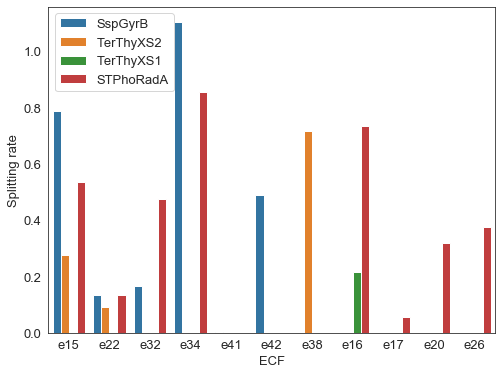

In [66]:
sns.barplot(data=joined[joined['ECF']!='e33'], x='ECF', y='kspl', hue='intein')
plt.ylabel('Splitting rate')
plt.legend(loc='best')
plt.show()

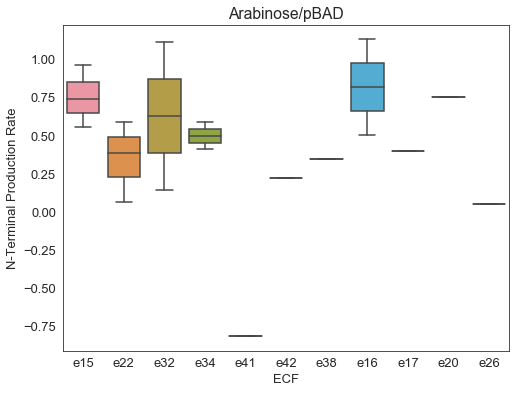

In [82]:
sns.boxplot(data=joined[joined['ECF']!='e33'], x='ECF', y='kpa', showfliers=False)
plt.ylabel('N-Terminal Production Rate')
plt.title('Arabinose/pBAD')
plt.show()

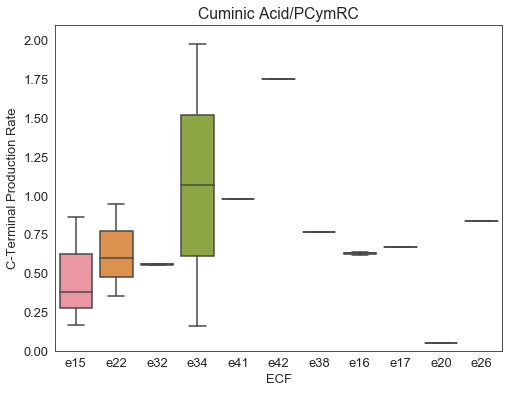

In [80]:
sns.boxplot(data=joined[joined['ECF']!='e33'], x='ECF', y='kpb', showfliers=False)
plt.ylabel('C-Terminal Production Rate')
plt.title('Cuminic Acid/PCymRC')
plt.show()